# Data loading and imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
import gdown

!gdown 1NNGVyVMJXG95nZwIqugM3mDtbyr9OTLH

Downloading...
From: https://drive.google.com/uc?id=1NNGVyVMJXG95nZwIqugM3mDtbyr9OTLH
To: c:\Users\kuzne\Documents\ACTIVE_PROJECTS\network_science\sem2\www.edgelist.txt

  0%|          | 0.00/20.1M [00:00<?, ?B/s]
  3%|▎         | 524k/20.1M [00:00<00:06, 3.24MB/s]
 10%|█         | 2.10M/20.1M [00:00<00:02, 6.15MB/s]
 21%|██        | 4.19M/20.1M [00:00<00:01, 9.27MB/s]
 37%|███▋      | 7.34M/20.1M [00:00<00:00, 15.0MB/s]
 50%|████▉     | 9.96M/20.1M [00:00<00:00, 15.7MB/s]
 63%|██████▎   | 12.6M/20.1M [00:01<00:00, 11.8MB/s]
 86%|████████▋ | 17.3M/20.1M [00:01<00:00, 18.3MB/s]
100%|██████████| 20.1M/20.1M [00:01<00:00, 15.7MB/s]


In [2]:
G = nx.read_edgelist('www.edgelist.txt', create_using=nx.DiGraph)

In [3]:
#@title Beautiful figure transformer { form-width: "300px" }
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab


def make_beautiful(ax):
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(4)
        ax.tick_params(width=4, direction = 'in', length = 8, pad=15)

    for axis in ['top','right']:
        ax.spines[axis].set_linewidth(0.0)

    #ax.locator_params(axis='x', nbins=8)
    #ax.locator_params(axis='y', nbins=8)
    ax.tick_params(axis='x', which='major', labelsize=26)
    ax.tick_params(axis='y', which='major', labelsize=26)

    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)
    
    params = {'legend.fontsize': 18,
              'axes.titlesize': 30,
    }
    
    pylab.rcParams.update(params)

    return ax


def create_default_figure(a=16, b=12):
    fig, ax = plt.subplots(figsize = (a,b))
    ax = make_beautiful(ax)

    return fig, ax

# Degree distribution

nx.Graph.degree returns DegreeView (similar to a dictionary)

In [4]:
dict(G.degree())

{'0': 7636,
 '1': 633,
 '2': 7,
 '3': 20,
 '4': 261,
 '5': 14,
 '6': 64,
 '7': 85,
 '8': 31,
 '9': 33,
 '10': 82,
 '11': 78,
 '12': 23,
 '13': 13,
 '14': 62,
 '15': 212,
 '16': 58,
 '17': 88,
 '18': 88,
 '19': 303,
 '20': 456,
 '21': 84,
 '22': 5,
 '23': 67,
 '24': 66,
 '25': 81,
 '26': 14,
 '27': 66,
 '28': 4,
 '29': 109,
 '30': 8,
 '31': 4,
 '32': 28,
 '33': 32,
 '34': 14,
 '35': 192,
 '36': 25,
 '37': 25,
 '38': 20,
 '39': 271,
 '40': 165,
 '41': 18,
 '42': 19,
 '43': 70,
 '44': 39,
 '45': 77,
 '46': 63,
 '47': 55,
 '48': 14,
 '49': 32,
 '50': 13,
 '51': 22,
 '52': 27,
 '53': 63,
 '54': 28,
 '55': 769,
 '56': 10,
 '57': 11,
 '58': 392,
 '59': 50,
 '60': 26,
 '61': 42,
 '62': 11,
 '63': 66,
 '64': 408,
 '65': 8,
 '66': 4,
 '67': 13,
 '68': 22,
 '69': 111,
 '70': 45,
 '71': 210,
 '72': 18,
 '73': 18,
 '74': 29,
 '75': 3,
 '76': 4,
 '77': 1,
 '78': 1,
 '79': 1,
 '80': 5,
 '81': 3,
 '82': 5,
 '83': 1,
 '84': 5,
 '85': 5,
 '86': 60,
 '87': 6,
 '88': 1,
 '89': 3,
 '90': 71,
 '91': 11,
 '9

In [5]:
G.degree('50')

13

In [6]:
G.out_degree('50')

6

In [7]:
G.in_degree('50')

7

Create a list of all degree values and print the maximum and minimum values of the degree:

In [8]:
degrees=[d for n, d in G.degree()]
print(np.mean(degrees))
print('Max degree:', np.max(degrees))
print('Min degree:', np.min(degrees)) 

9.192512794378148
Max degree: 10721
Min degree: 1


Text(0, 0.5, '$\\rho(k)$')

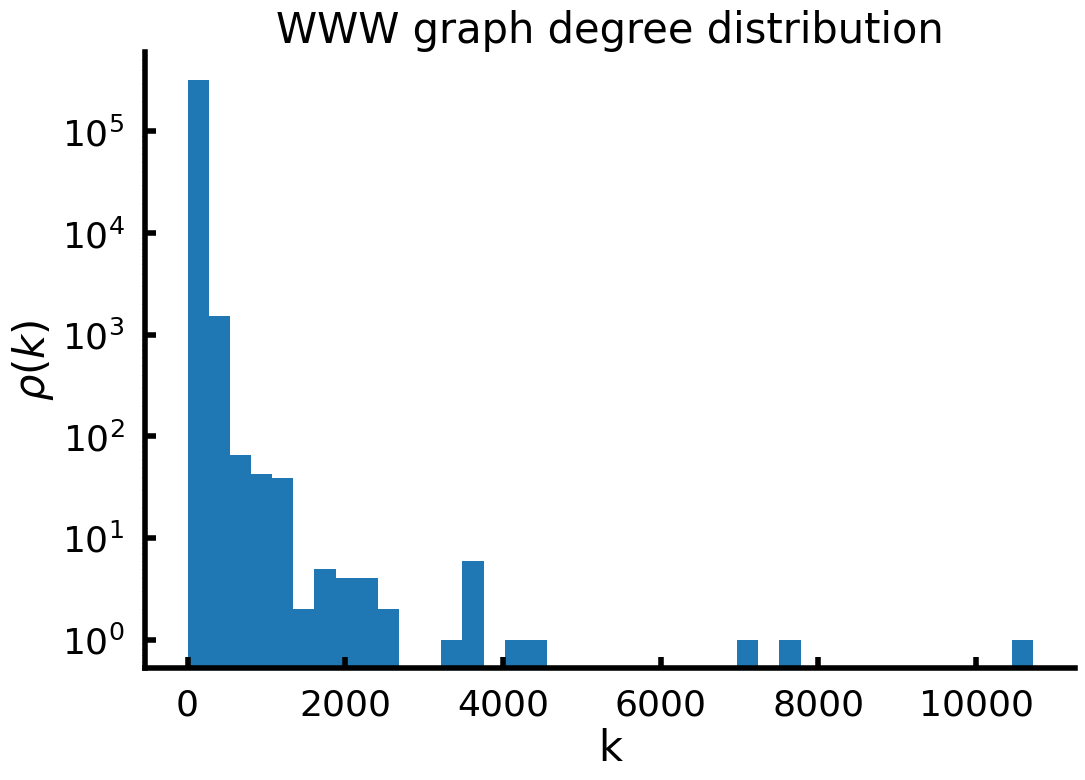

In [9]:
fig, ax = plt.subplots(figsize = (12,8))
_ = ax.hist(degrees, bins=40, log=True)

ax = make_beautiful(ax)
ax.set_title('WWW graph degree distribution')
ax.set_xlabel('k')
ax.set_ylabel(r'$\rho(k)$')

Let's separate in- and out-degrees:

In [10]:
out_degrees=[d for n, d in G.out_degree()]
print(np.mean(out_degrees))
print('Max out-degree:', np.max(out_degrees))
print('Min out-degree:', np.min(out_degrees)) 

4.596256397189074
Max out-degree: 3445
Min out-degree: 0


In [11]:
in_degrees=[d for n, d in G.in_degree()]
print(np.mean(in_degrees))
print('Max in-degree:', np.max(in_degrees))
print('Min in-degree:', np.min(in_degrees))

4.596256397189074
Max in-degree: 10721
Min in-degree: 1


In [12]:
import gc

arr = np.arange(1, 10**7)

In [13]:
del arr

In [14]:
gc.collect()

5081

In [15]:
out_degrees = np.array(out_degrees)
in_degrees = np.array(in_degrees)

In [16]:
out_degrees_tr = out_degrees[np.where(out_degrees < 1500)]
in_degrees_tr = in_degrees[np.where(in_degrees < 1500)]

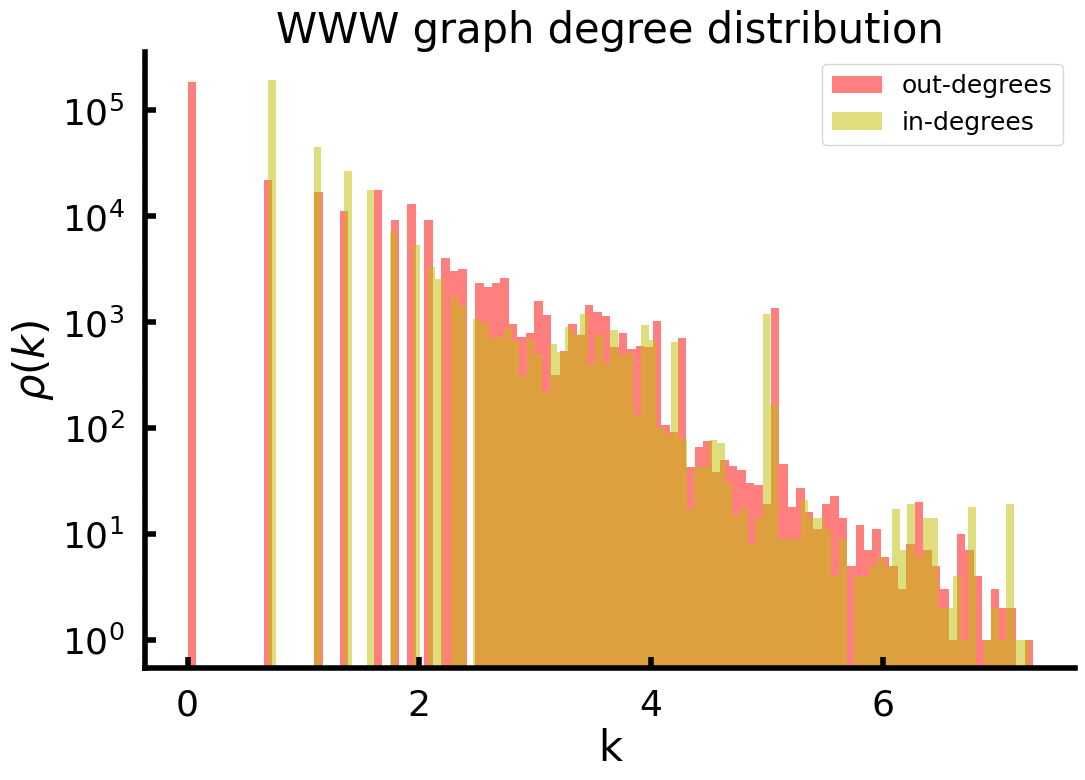

In [17]:
fig, ax = plt.subplots(figsize = (12,8))
_ = ax.hist(np.log(out_degrees_tr+1), bins=100, log=True, alpha = 0.5, color='r', label='out-degrees')
_ = ax.hist(np.log(in_degrees_tr+1), bins=100, log=True, alpha = 0.5, color='y', label='in-degrees')

ax = make_beautiful(ax)
#x.set_xscale('log')
ax.set_title('WWW graph degree distribution')
ax.set_xlabel('k')
ax.set_ylabel(r'$\rho(k)$')

ax.legend()

# Clustering & transitivity

In [18]:
scc = list(nx.strongly_connected_components(G))
sorted_scc = sorted(scc, key = len)

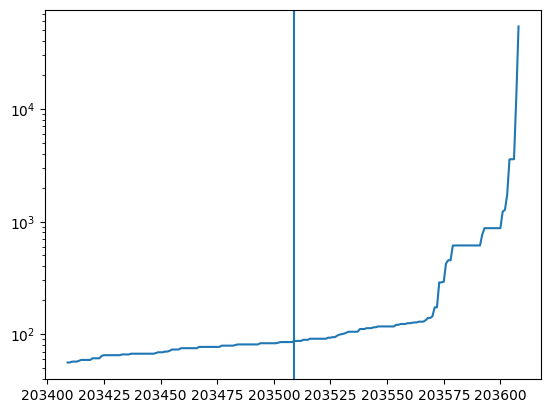

In [33]:
xdata = np.arange(len(sorted_scc))
ydata = [len(comp) for comp in sorted_scc]
plt.semilogy(xdata[-200:], ydata[-200:])

ind = 100
plt.axvline(x=len(sorted_scc) - ind);

In [19]:
H = nx.to_undirected(nx.subgraph(G, sorted_scc[-10]))

In [20]:
len(H)

873


1. transitivity or global transitivity coefficient
$$
T=\frac{6N_t}{\sum_i k_i(k_i-1)},
$$

$N_t$ is the number of triangles,

$k_i$ is the degree of vertices, $\sum_i k_i(k_i-1)/2$ describes the number of all triples in the network.


2. The clustering coefficient $i$ of a vertex:

$$
C=\frac{2N_t(i)}{k_i(k_i-1)},
$$
$N_t$ is the number of triangles with vertex $i$.

In [21]:
print(nx.transitivity(H))

0.04893378993484035


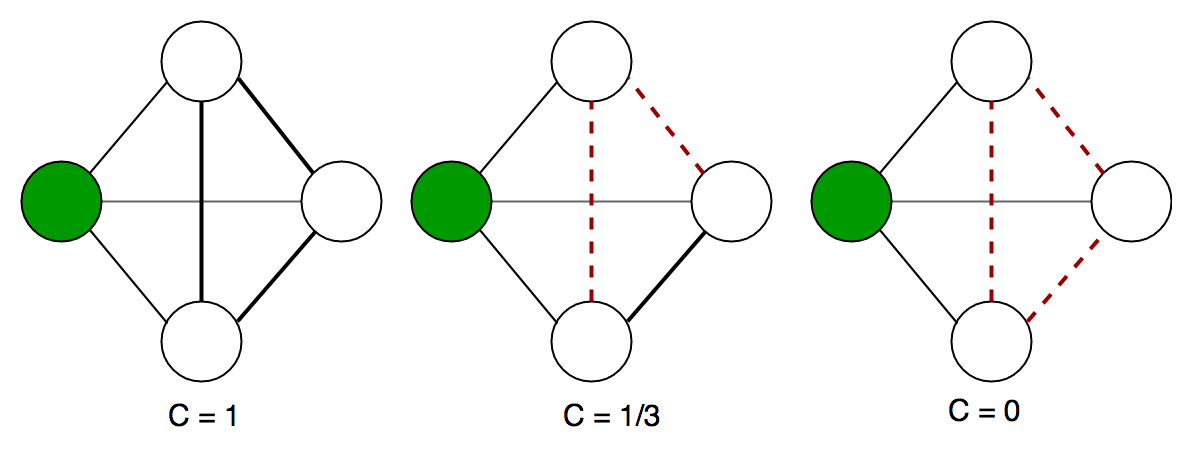

In [35]:
print(nx.clustering(G,list(H.nodes())[100])) # for a single node
print(nx.average_clustering(G))

0.5
0.1590394275734186


In [36]:
clustering = list(nx.clustering(H).values())
degrees=[d for n, d in H.degree()]

Text(0, 0.5, 'C(k)')

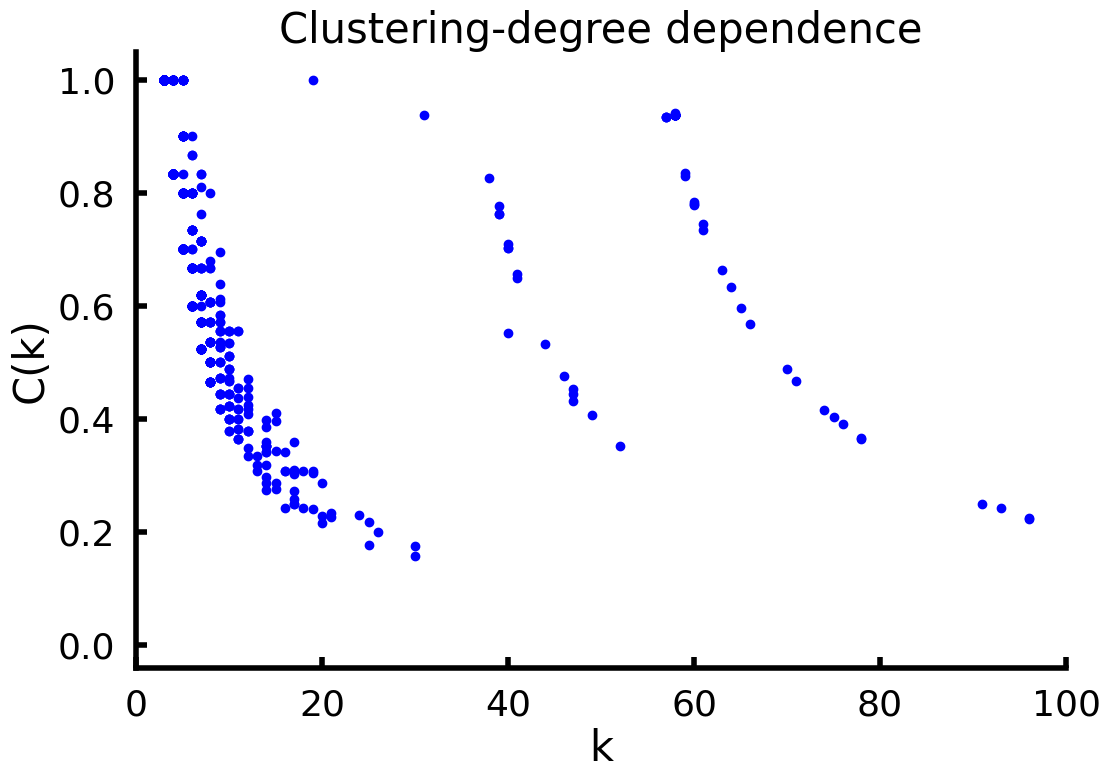

In [39]:
fig, ax = plt.subplots(figsize = (12,8))
ax = make_beautiful(ax)

ax.scatter(degrees, clustering, c = 'b')
ax.set_xlim(0, 100)
ax.set_title('Clustering-degree dependence')
ax.set_xlabel('k')
ax.set_ylabel('C(k)')

## Degree correlations

Let's assume our graph is undirected:

In [40]:
left_degree = [G.degree[P] for (P,Q) in G.edges()]
right_degree = [G.degree[Q] for (P,Q) in G.edges()]

l = left_degree+right_degree # for an undirected graph we need to account for "both directions"
r = right_degree+left_degree

In [41]:
from scipy.stats import pearsonr as corr_coef

Pearson correlation of "left" and "right" degrees is called the network assortativity coefficient

In [42]:
print(corr_coef(l,r)[0])
G_scalar = nx.to_undirected(G)
print(nx.degree_assortativity_coefficient(G, x = 'in', y = 'in'))

-0.042754393042426724
-0.022776392348925582


Now we are adding directions:

In [43]:
left_degree = [G.out_degree[P] for (P,Q) in G.edges()]
right_degree = [G.in_degree[Q] for (P,Q) in G.edges()]

l = left_degree
r = right_degree

In [44]:
print(corr_coef(l,r)[0])

-0.061656659649969484


In [45]:
mm = nx.degree_mixing_matrix(G, x='out', y='in')

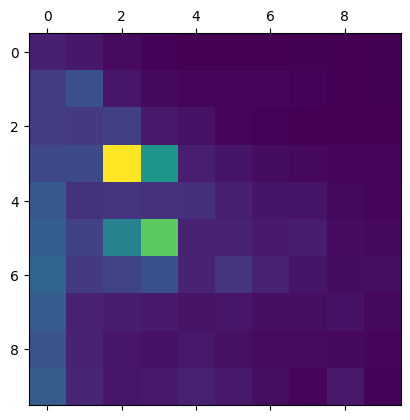

In [46]:
plt.matshow(mm[:10,:10])

In [47]:
print(nx.degree_assortativity_coefficient(G, x = 'out', y = 'in'))

-0.061656659649931535


However, often the correlation coefficient is introduced using the degree correlation matrix, the element $e_{i,j}$ of which describes the proportion of edges connecting the vertex with the value of degree $i$ with the vertex of degree $j$.
(https://sci-hub.ru/10.1103/PhysRevE.67.026126)

In [48]:
nn_degrees=nx.average_neighbor_degree(G).values()

In [ ]:
nn_degrees

In [51]:
gc.collect()

0

# Part 2: data preparation

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
import pandas as pd
%matplotlib inline

Let's consider one of the standard datasets - a network of social contacts of people [engaged in karate](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).

In [54]:
G = nx.karate_club_graph()

print('Nodes:',G.number_of_nodes())
print('Edges:',G.number_of_edges())
print('Density:',nx.density(G))

Nodes: 34
Edges: 78
Density: 0.13903743315508021


In [55]:
def draw_net(G, pos, metrics, name, ax = None):

    norm = 1000/np.max(metrics)

    options = {
    'with_labels':True,
    'node_color': [v * norm for v in metrics],
    'node_size': [v * norm for v in metrics],
    'edge_color': 'black',
    'linewidths': 1.5,
    'width': 1.5,
    'cmap': 'YlGnBu'
    #'cmap': 'Spectral'
    }

    nx.draw(G, pos, **options)

    if ax is None:
        fig, ax = plt.subplots(figsize = (12,8))

    ax.set_title(name, fontsize=24)

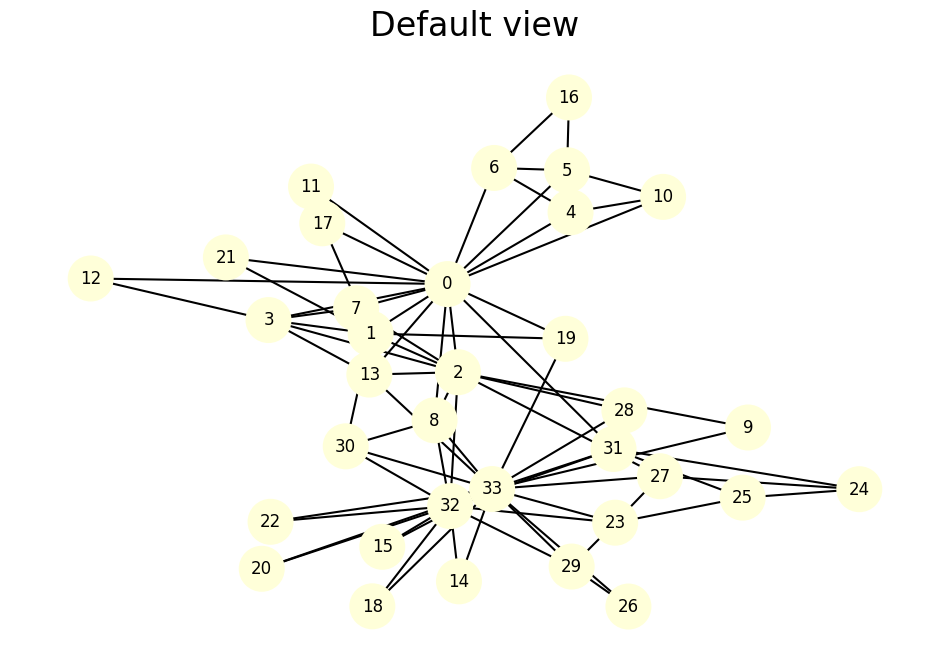

In [56]:
seed = 42
pos = nx.spring_layout(G, iterations=100, seed = seed) # node coordinates

fig, ax = plt.subplots(figsize = (12,8))
draw_net(G, pos, list(np.ones(G.number_of_nodes())), 'Default view', ax = ax)

# Network centrality measures

### Degree centrality

Degree centrality shows the fraction of the nearest neighbors of vertex $i$ out of the maximum possible $N-1$, $N$ is the number of vertices in the network.
$$
c_d(i)=\frac{k_i}{N-1}.
$$

In [57]:
nx.degree_centrality(G)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

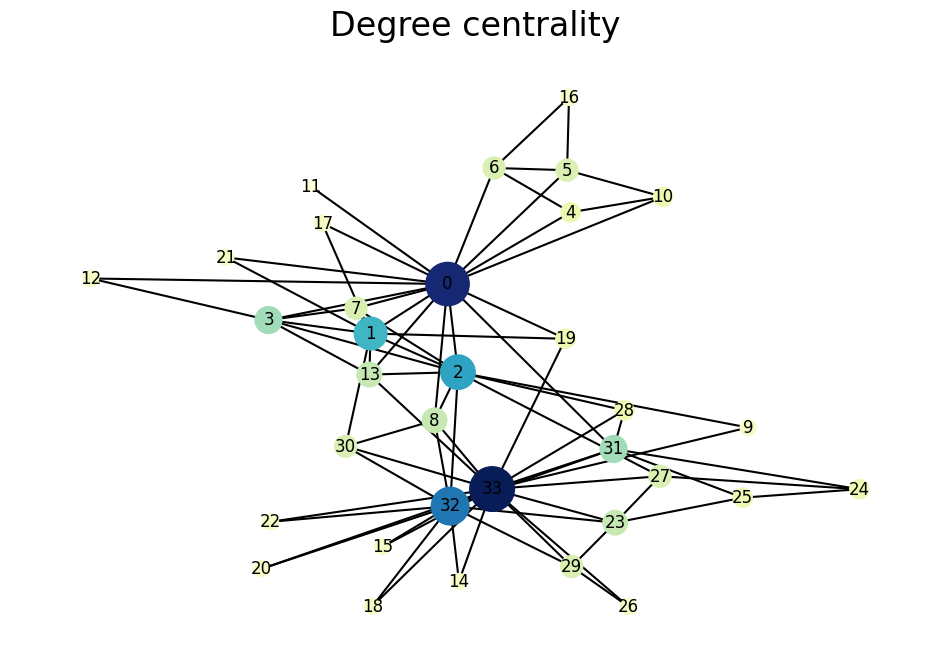

In [58]:
fig, ax = plt.subplots(figsize = (12,8))
draw_net(G, pos, list(nx.degree_centrality(G).values()), 'Degree centrality', ax = ax)

### Betweenness centrality 
$c_{b}(i)$ is determined by the fraction of the shortest paths passing through the $i$-th vertex:
$$
c_{b}(i)=\frac{1}{(N-1)(N-2)}\sum_{j\ne i \ne k}\frac{\sigma_{j,k}(i)}{\sigma_{j,k}}
$$
where $\sigma_{j,k}$ is the number of shortest paths between vertices $j$ and $k$, $\sigma_{j,k}(i)$ are those that pass through vertex $i$.

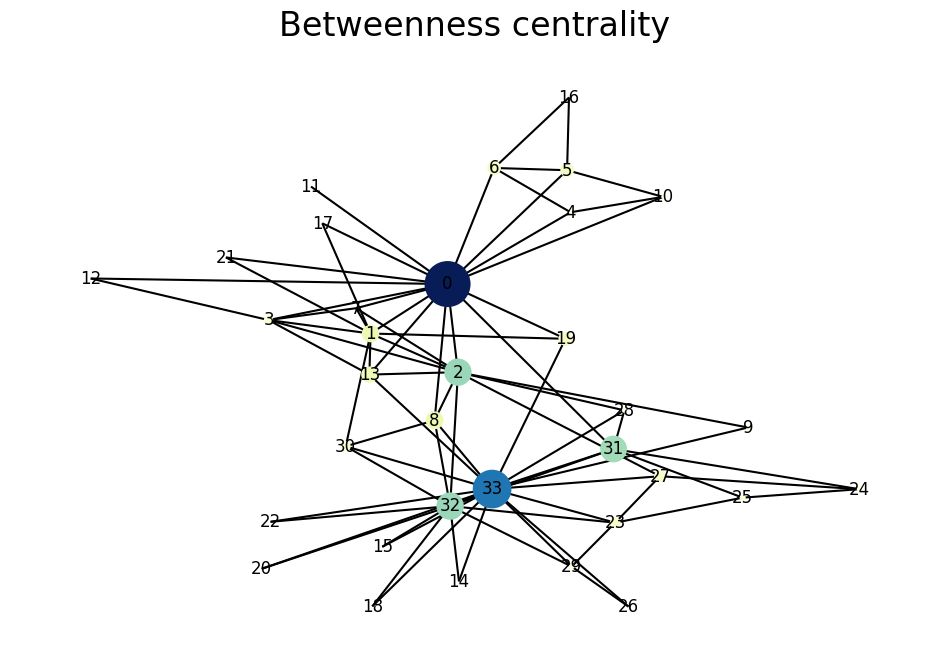

In [59]:
fig, ax = plt.subplots(figsize = (12,8))
draw_net(G, pos, list(nx.betweenness_centrality(G).values()), 'Betweenness centrality', ax = ax)

### Eigenvector centrality

$$
c_e(i)=x_i,
$$
where $x_i$ is the $i$ component of the eigenvector $\vec{x}$ of the adjacency matrix of the graph $A$ corresponding to the largest eigenvalue $\lambda_{max}$:
$$
A\vec{x}=\lambda_{max}\vec{x}.
$$

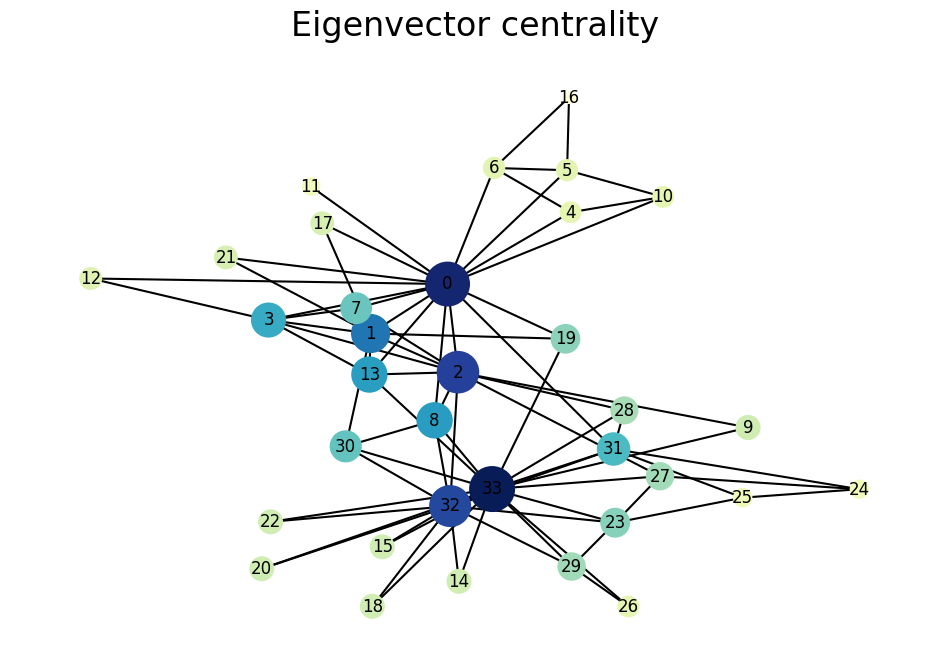

In [60]:
fig, ax = plt.subplots(figsize = (12,8))
draw_net(G, pos, list(nx.eigenvector_centrality(G).values()), 'Eigenvector centrality', ax = ax)

## Closeness centrality
$$
C_{c}(i)=\frac{N-1}{\sum_{j}d(i,j)},
$$

$d(i,j)$ is the length of the shortest path from vertex $i$ to vertex $j$.

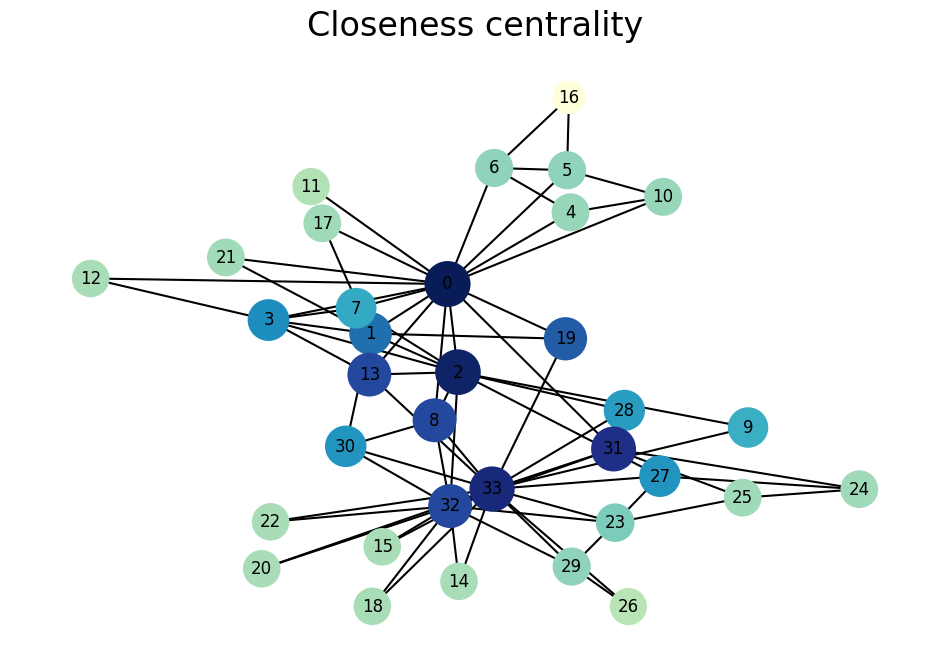

In [61]:
fig, ax = plt.subplots(figsize = (12,8))
draw_net(G, pos, list(nx.closeness_centrality(G).values()), 'Closeness centrality', ax = ax)

## [Rich club coefficient](https://en.wikipedia.org/wiki/Rich-club_coefficient)

RC is determined as:
$$
\phi(k)=\frac{2E_{>k}}{N_{>k}(N_{>k}-1)},
$$

where ${\displaystyle E_{>k}}$ - is the number of edges between nodes with a degree >$k$, $N_{>k}$ - is the number of such nodes. 

See more in the [paper](https://arxiv.org/pdf/physics/0701290.pdf)

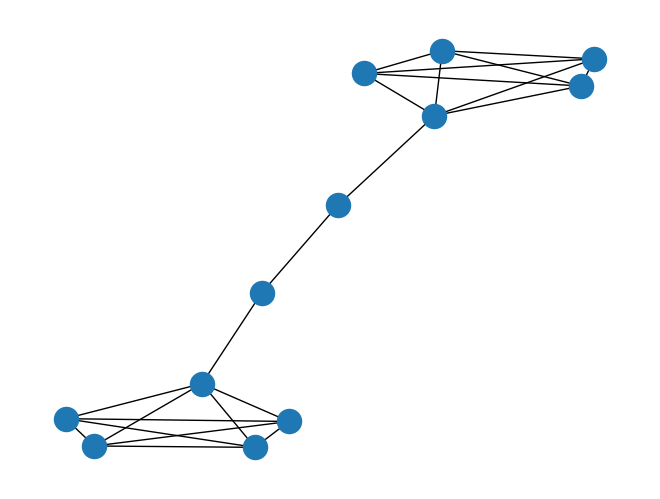

In [62]:
BR= nx.barbell_graph(5,2)
nx.draw(BR)

In [63]:
nx.rich_club_coefficient(BR, normalized=False, seed=42)

{0: 0.3484848484848485,
 1: 0.3484848484848485,
 2: 0.4444444444444444,
 3: 0.4444444444444444,
 4: 0.0}